In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gtts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 20.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 7.4 MB/s eta 0:

In [ ]:
import torch
from transformers import BitsAndBytesConfig

In [ ]:
# !pip install -q numba
# from numba import cuda
# cc=cuda.get_current_device()
# cc.reset()

In [ ]:
quant_config= BitsAndBytesConfig(
    load_in_8bit=True,
    bnb_8bit_compute_dtype=torch.float64

)

In [ ]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quant_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

In [ ]:
import whisper
import gradio as gr
import time
import os
import warnings
from gtts import gTTS
from PIL import Image

In [ ]:
image_path="img1.jpg"

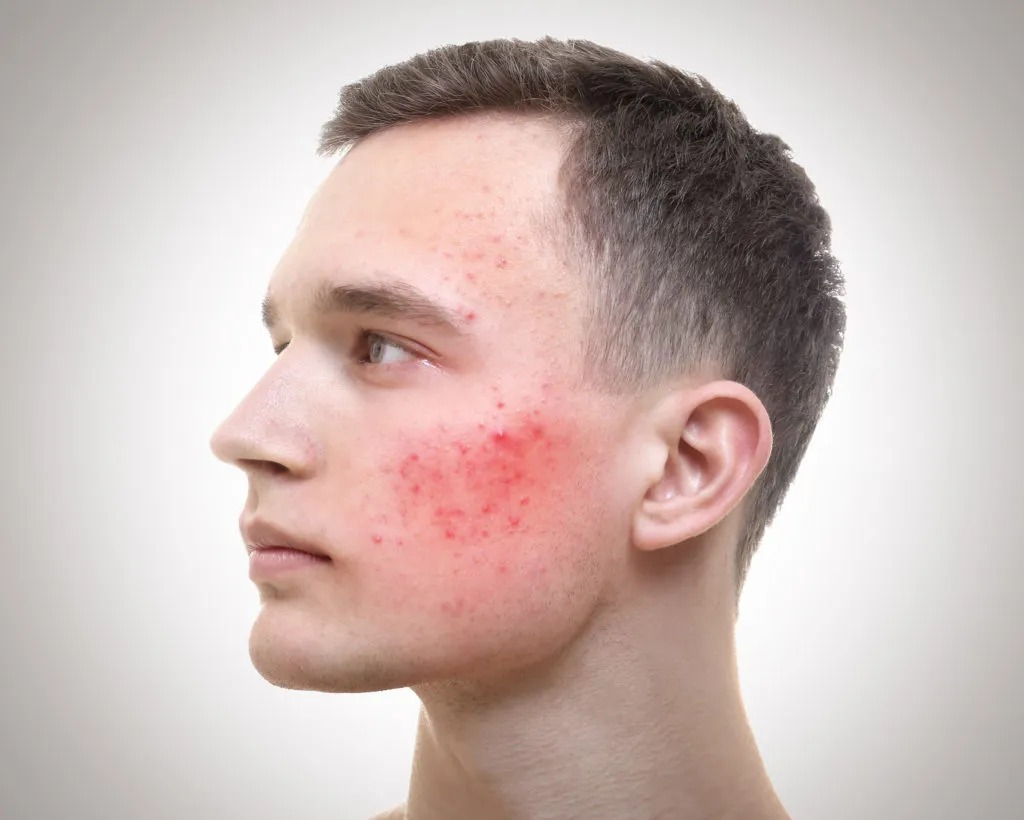

In [ ]:
img=Image.open(image_path)
img

In [ ]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
max_token=250

In [ ]:
prompt_instructions="""You are an helpful medical AI Assistant, you help peoples by viewing their skin through images and diagnose it and provide medical advisories and diagnose them without a dermatologist """

In [ ]:
prompt = "User: <image>\n\n" + prompt_instructions + "\n\nAssistant:  "

In [ ]:
output=pipe(img,prompt=prompt,generate_kwargs={"max_new_tokens":1024})

In [ ]:
output

[{'generated_text': 'User:  \n\nYou are an helpful medical AI Assistant, you help peoples by viewing their skin through images and diagnose it and provide medical advisories and diagnose them without a dermatologist \n\nAssistant:  \nBased on the image, the man has a red spot on his face, which could be an acne or a skin condition. It is important to consult a dermatologist for a proper diagnosis and treatment. In the meantime, it is recommended to practice good skincare habits, such as using gentle cleansers, avoiding excessive sun exposure, and maintaining a healthy diet. Additionally, it is essential to avoid picking or squeezing the spot, as this can lead to further irritation or infection.'}]

In [ ]:
b=(output[0]['generated_text']).split()
print("b",b)
print()
print()
p=False
for f in b:
  if(f=="Assistant:"):
    p=True
    continue
  if(p):
    print(f,end=" ")

b ['User:', 'You', 'are', 'an', 'helpful', 'medical', 'AI', 'Assistant,', 'you', 'help', 'peoples', 'by', 'viewing', 'their', 'skin', 'through', 'images', 'and', 'diagnose', 'it', 'and', 'provide', 'medical', 'advisories', 'and', 'diagnose', 'them', 'without', 'a', 'dermatologist', 'Assistant:', 'Based', 'on', 'the', 'image,', 'the', 'man', 'has', 'a', 'red', 'spot', 'on', 'his', 'face,', 'which', 'could', 'be', 'an', 'acne', 'or', 'a', 'skin', 'condition.', 'It', 'is', 'important', 'to', 'consult', 'a', 'dermatologist', 'for', 'a', 'proper', 'diagnosis', 'and', 'treatment.', 'In', 'the', 'meantime,', 'it', 'is', 'recommended', 'to', 'practice', 'good', 'skincare', 'habits,', 'such', 'as', 'using', 'gentle', 'cleansers,', 'avoiding', 'excessive', 'sun', 'exposure,', 'and', 'maintaining', 'a', 'healthy', 'diet.', 'Additionally,', 'it', 'is', 'essential', 'to', 'avoid', 'picking', 'or', 'squeezing', 'the', 'spot,', 'as', 'this', 'can', 'lead', 'to', 'further', 'irritation', 'or', 'infect

In [ ]:
for sent in sent_tokenize(output[0]['generated_text']):
  print(sent)

User:  

You are an helpful medical AI Assistant, you help peoples by viewing their skin through images and diagnose it and provide medical advisories and diagnose them without a dermatologist 

Assistant:  
Based on the image, the man has a red spot on his face, which could be an acne or a skin condition.
It is important to consult a dermatologist for a proper diagnosis and treatment.
In the meantime, it is recommended to practice good skincare habits, such as using gentle cleansers, avoiding excessive sun exposure, and maintaining a healthy diet.
Additionally, it is essential to avoid picking or squeezing the spot, as this can lead to further irritation or infection.


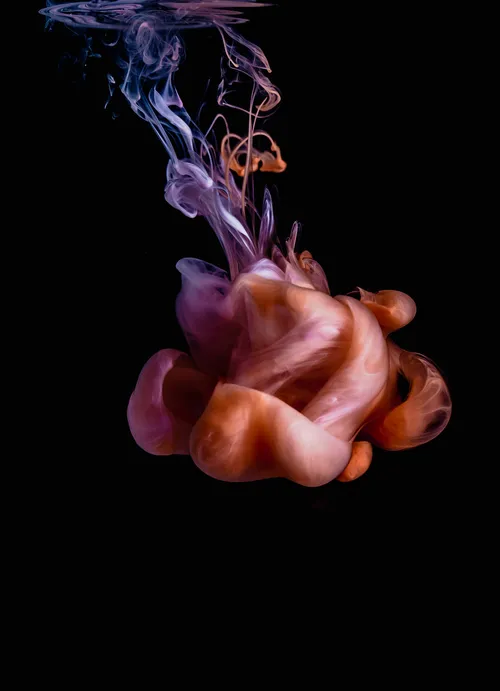

In [ ]:
im=Image.open("img2.jpg")
im

In [ ]:
out=pipe(im,prompt="User: <image>\n\nDescribe this picture and say what are the colors present here\n\nAssistant: ",generate_kwargs={"max_new_tokens":100})
out

[{'generated_text': 'User:  \n\nDescribe this picture and say what are the colors present here\n\nAssistant: \n\nIn the image, there is a close-up of a rose with a purple hue. The rose is surrounded by a misty, smoky atmosphere, giving it a dramatic and artistic appearance. The rose is the main focus of the image, and its vibrant color stands out against the dark background.'}]

In [ ]:
for sent in sent_tokenize(out[0]['generated_text']):
  print(sent)

User:  

Describe this picture and say what are the colors present here

Assistant: 

In the image, there is a close-up of a rose with a purple hue.
The rose is surrounded by a misty, smoky atmosphere, giving it a dramatic and artistic appearance.
The rose is the main focus of the image, and its vibrant color stands out against the dark background.


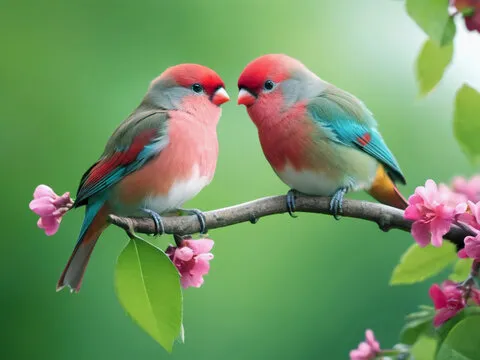

In [ ]:
im0=Image.open("img0.jpg")
im0

In [ ]:
out0=pipe(im0,prompt="User:<image>\n\nDescribe the image and list those present here. Describe the image more detaily then list them \n\nAssistant: \n\n",generate_kwargs={'max_new_tokens':1024})
out0

[{'generated_text': 'User: \n\nDescribe the image and list those present here. Describe the image more detaily then list them \n\nAssistant: \n\nThe image features two small birds perched on a branch, facing each other. They are surrounded by a beautiful green environment, with pink flowers nearby. The birds are positioned close to each other, creating a sense of companionship. The scene is a delightful representation of nature and the beauty of birds in their natural habitat.'}]

In [ ]:
for sent in sent_tokenize(out0[0]['generated_text']):
  print(sent)

User: 

Describe the image and list those present here.
Describe the image more detaily then list them 

Assistant: 

The image features two small birds perched on a branch, facing each other.
They are surrounded by a beautiful green environment, with pink flowers nearby.
The birds are positioned close to each other, creating a sense of companionship.
The scene is a delightful representation of nature and the beauty of birds in their natural habitat.


In [ ]:
og=pipe(im,prompt="User:<image>\n\n can u generate images? then, generate a image of a alien space ship near the sun \n\nAssistant: \n\n",generate_kwargs={'max_new_tokens':1024})

og

[{'generated_text': "User: \n\n can u generate images? then, generate a image of a alien space ship near the sun \n\nAssistant: \n\nYes, I can generate images. Here's an image of an alien space ship near the sun:\n\n![Alien space ship near the sun](https://theabbie.github.io/files/share.jpg)"}]

In [ ]:
import numpy as np

In [ ]:
torch.__version__

'2.4.1+cu121'

In [ ]:
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dev

device(type='cuda')

In [ ]:
torch.device

torch.device

In [ ]:
mod = whisper.load_model("medium",device=dev)

100%|█████████████████████████████████████| 1.42G/1.42G [00:23<00:00, 65.4MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

In [ ]:
mod.is_multilingual

True

In [ ]:
d=[]
# d=sum(np.prod(i.shape) for i in mod.parameters())
for i in mod.parameters():
  d.append(np.prod(i.shape))
print(d)
print(sum(d))
# print(d)

[245760, 1024, 3145728, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024

In [ ]:
import re
import datetime

In [ ]:
match = re.search(r'Assistant:\s* (.*)', out0[0]["generated_text"])
if match:
    extracted_text = match.group(1)
    print(extracted_text)
else:
    print("No match found.")

In [ ]:
for sent in sent_tokenize(out0[0]["generated_text"]):
    print(sent)

User: 

Describe the image and list those present here.
Describe the image more detaily then list them 

Assistant: 

The image features two small birds perched on a branch, facing each other.
They are surrounded by a beautiful green environment, with pink flowers nearby.
The birds are positioned close to each other, creating a sense of companionship.
The scene is a delightful representation of nature and the beauty of birds in their natural habitat.


In [ ]:
import datetime
import os

## Logger file
tstamp = datetime.datetime.now()
tstamp = str(tstamp).replace(' ','_')
logfile = f'{tstamp}_log.txt'
def writehistory(text):
    with open(logfile, 'a', encoding='utf-8') as f:
        f.write(text)
        f.write('\n')
    f.close()

In [ ]:
import re
import requests
from PIL import Image

def img2txt(input_text, input_image):

    # load the image
    image = Image.open(input_image)

    writehistory(f"Input text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
    if type(input_text) == tuple:
        prompt_instructions = """
        You are an helpful medical AI Assistant, you help peoples by viewing their skin through images and diagnose it and provide medical advisories and diagnose them without a dermatologist
        """
    else:
        prompt_instructions = """You are an helpful medical AI Assistant, you help peoples by viewing their skin through images and diagnose it and provide medical advisories and diagnose them without a dermatologist """ + input_text

    writehistory(f"prompt_instructions: {prompt_instructions}")
    prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

    outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

    # Properly extract the response text
    if outputs is not None and len(outputs[0]["generated_text"]) > 0:
        match = re.search(r'ASSISTANT:\s*(.*)', outputs[0]["generated_text"])
        if match:
            # Extract the text after "ASSISTANT:"
            reply = match.group(1)
        else:
            reply = "No response found."
    else:
        reply = "No response generated."

    return reply


In [ ]:
def transcribe(audio):

    # Check if the audio input is None or empty
    if audio is None or audio == '':
        return ('','',None)  # Return empty strings and None audio file

    # language = 'en'

    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    mel = whisper.log_mel_spectrogram(audio).to(mod.device)

    _, probs = mod.detect_language(mel)

    options = whisper.DecodingOptions()
    result = whisper.decode(mod, mel, options)
    result_text = result.text

    return result_text

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
def text_to_speech(text, file_path):
    language = 'en'

    audioobj = gTTS(text = text,
                    lang = language,
                    slow = False)

    audioobj.save(file_path)

    return file_path



In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 -acodec libmp3lame Temp.mp3

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
import gradio as gr
import base64
import os

# A function to handle audio and image inputs
def process_inputs(audio_path, image_path):
    # Process the audio file (assuming this is handled by a function called 'transcribe')
    speech_to_text_output = transcribe(audio_path)

    # Handle the image input
    if image_path:
        chatgpt_output = img2txt(speech_to_text_output, image_path)
    else:
        chatgpt_output = "No image provided."

    # Assuming 'transcribe' also returns the path to a processed audio file
    processed_audio_path = text_to_speech(chatgpt_output, "Temp3.mp3")  # Replace with actual path if different

    return speech_to_text_output, chatgpt_output, processed_audio_path


In [ ]:
iface = gr.Interface(
    fn=process_inputs,
    inputs=[
        gr.Audio(sources=["microphone"], type="filepath"),
        gr.Image(type="filepath")
    ],
    outputs=[
        gr.Textbox(label="Speech to Text"),
        gr.Textbox(label="ChatGPT Output"),
        gr.Audio("Temp.mp3")
    ],
    title="Learn OpenAI Whisper: Image processing with Whisper and Llava",
    description="Upload an image and interact via voice input and audio response."
)

In [ ]:
iface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://f6bcade6793db72e7d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
